In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [6]:
def draw(pipeline):
  # Cross-validation
  cv = KFold(n_splits=5, shuffle=True, random_state=42)
  scores = cross_val_score(pipeline, X, y, cv=cv, scoring="neg_mean_absolute_error")
  mae_scores = -scores
  mean_mae = mae_scores.mean()
  std_mae = mae_scores.std()

  # Plotting
  plt.figure(figsize=(8, 5))
  plt.plot(range(1, 6), mae_scores, marker='o', label="MAE per Fold", color='blue')
  plt.axhline(mean_mae, color='red', linestyle='--', label=f"Mean MAE = {mean_mae:.2f}")
  plt.fill_between(range(1, 6), mean_mae - std_mae, mean_mae + std_mae, color='red', alpha=0.1, label="±1 Std Dev")
  plt.title("Cross-Validation MAE per Fold (Gradient Boosting Regressor)")
  plt.xlabel("Fold Number")
  plt.ylabel("Mean Absolute Error")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

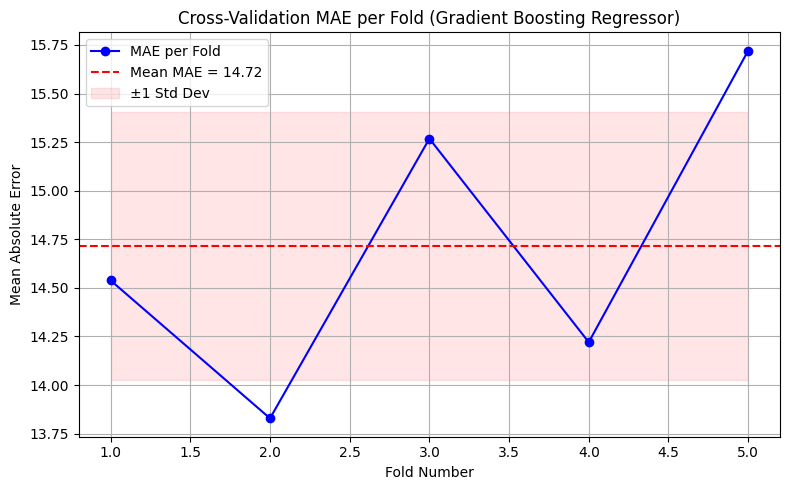

In [7]:
# Load the data
df = pd.read_csv("response_summary.csv")
X = df.drop(columns=["500 response"])
y = df["500 response"]
X.columns = [col.replace(" ", "_") for col in X.columns]

# Build pipeline
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("model", GradientBoostingRegressor(random_state=42))
])

draw(pipeline)


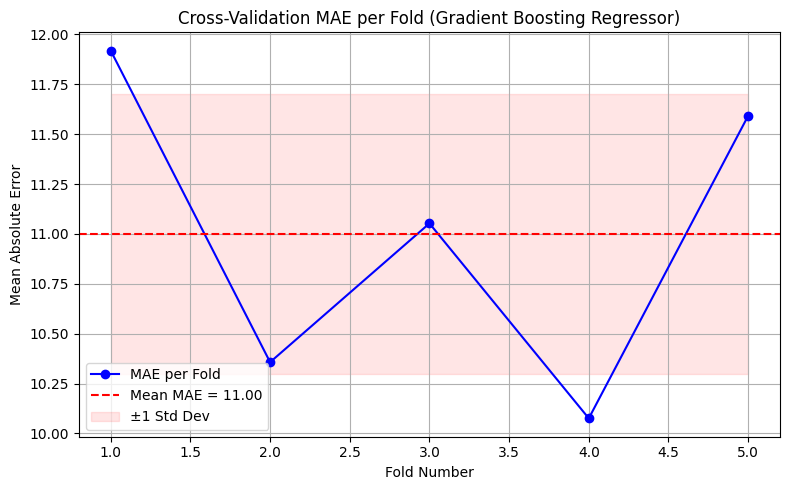

In [8]:
# Define a pipeline with preprocessing and model
rf_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

draw(rf_pipeline)


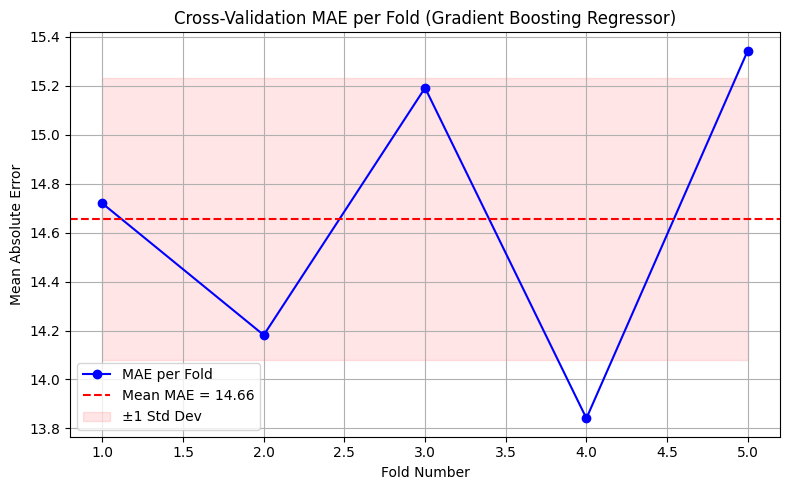

In [9]:
from sklearn.ensemble import HistGradientBoostingRegressor

HGBR_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    # No scaler needed: HistGradientBoosting handles raw features efficiently
    ("model", HistGradientBoostingRegressor(random_state=42))
])
draw(HGBR_pipeline)

In [12]:
pip install lightgbm lightgbm

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 1860, number of used features: 7
[LightGBM] [Info] Start training from score 12.010215
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 1860, number of used features: 7
[LightGBM] [Info] Start training from score 12.313978


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 1860, number of used features: 7
[LightGBM] [Info] Start training from score 12.120430


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 1860, number of used features: 7
[LightGBM] [Info] Start training from score 12.271505
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data points in the train set: 1860, number of used features: 7
[LightGBM] [Info] Start training from score 12.038710


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stoc

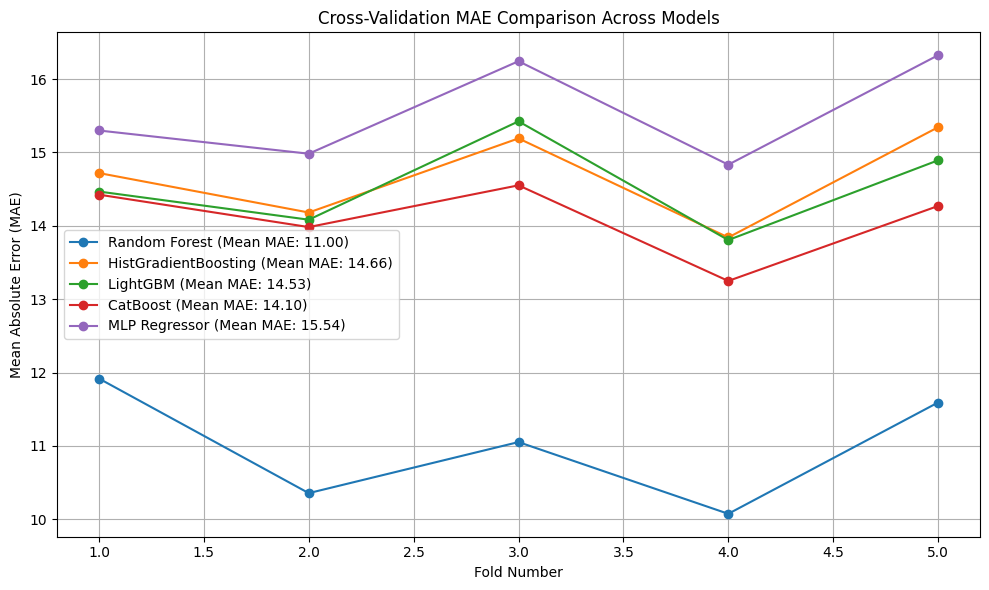

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Load dataset
df = pd.read_csv("response_summary.csv")  # Replace with your actual file path
X = df.drop(columns=["500 response"])
y = df["500 response"]
X.columns = [col.replace(" ", "_") for col in X.columns]  # Clean column names

# Prepare cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Models to compare
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=500)
}

# Store results
results = {}

for name, model in models.items():
    steps = [("imputer", SimpleImputer(strategy="mean"))]

    # Only scale for models that benefit from it
    if name not in ["HistGradientBoosting", "CatBoost", "LightGBM"]:
        steps.append(("scaler", StandardScaler()))

    steps.append(("model", model))
    pipeline = Pipeline(steps)

    scores = cross_val_score(pipeline, X, y, cv=cv, scoring="neg_mean_absolute_error")
    results[name] = -scores  # Convert to positive MAE

# Plot the results
plt.figure(figsize=(10, 6))
for name, scores in results.items():
    plt.plot(range(1, 6), scores, marker='o', label=f"{name} (Mean MAE: {np.mean(scores):.2f})")

plt.title("Cross-Validation MAE Comparison Across Models")
plt.xlabel("Fold Number")
plt.ylabel("Mean Absolute Error (MAE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
